# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# The trends observed below begin with temperature having a strong variance based on the latitude. Secondly there is no correlation between latidude and cloudiness. Lastly the further along the latitude results in higher humidy levels.  

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = [] 
lat_list = []
lng_list = []
max_temp_list = []
wind_Speed_list = []
counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


#create loop to count through cities and append
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_Speed_list.append(response["wind"]["speed"])
        if counter > 49:
            counter = 0
            set_counter = set_counter + 1
    
        else:
            counter = counter + 1
            
        print(f"Processing Record {counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : sorland
Processing Record 2 of Set 1 : rio gallegos
Processing Record 3 of Set 1 : lhokseumawe
Processing Record 4 of Set 1 : avarua
Processing Record 5 of Set 1 : sao filipe
Processing Record 6 of Set 1 : shimanovsk
Processing Record 7 of Set 1 : atambua
Processing Record 8 of Set 1 : cabo san lucas
City not found. Skipping...
Processing Record 9 of Set 1 : altay
Processing Record 10 of Set 1 : alyangula
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : hasaki
Processing Record 13 of Set 1 : nikolskoye
Processing Record 14 of Set 1 : kulhudhuffushi
Processing Record 15 of Set 1 : cayenne
Processing Record 16 of Set 1 : port elizabeth
Processing Record 17 of Set 1 : bluff
Processing Record 18 of Set 1 : ahipara
Processing Record 19 of Set 1 : ushuaia
Processing Record 20 of Set 1 : fallon
Processing Record 21 of Set 1 : urbana
Processing Record 22 of Set 1 : vaini
City not found

Processing Record 36 of Set 4 : nouadhibou
Processing Record 37 of Set 4 : loreto
Processing Record 38 of Set 4 : topolobampo
Processing Record 39 of Set 4 : poitiers
Processing Record 40 of Set 4 : coihaique
Processing Record 41 of Set 4 : kijang
Processing Record 42 of Set 4 : derzhavinsk
Processing Record 43 of Set 4 : kempele
Processing Record 44 of Set 4 : bakchar
Processing Record 45 of Set 4 : sangmelima
Processing Record 46 of Set 4 : bria
Processing Record 47 of Set 4 : bagdarin
Processing Record 48 of Set 4 : itai
Processing Record 49 of Set 4 : chenzhou
Processing Record 50 of Set 4 : phangnga
Processing Record 0 of Set 5 : skibbereen
Processing Record 1 of Set 5 : luderitz
Processing Record 2 of Set 5 : nata
Processing Record 3 of Set 5 : ginir
Processing Record 4 of Set 5 : pacific grove
Processing Record 5 of Set 5 : aksehir
Processing Record 6 of Set 5 : hithadhoo
Processing Record 7 of Set 5 : mahenge
Processing Record 8 of Set 5 : yellowknife
Processing Record 9 of Set

Processing Record 24 of Set 8 : ormara
Processing Record 25 of Set 8 : brenes
Processing Record 26 of Set 8 : khandbari
Processing Record 27 of Set 8 : aksu
Processing Record 28 of Set 8 : anadyr
Processing Record 29 of Set 8 : iguai
Processing Record 30 of Set 8 : beloha
Processing Record 31 of Set 8 : tarbert
City not found. Skipping...
Processing Record 32 of Set 8 : elko
Processing Record 33 of Set 8 : lata
Processing Record 34 of Set 8 : semirom
City not found. Skipping...
Processing Record 35 of Set 8 : tarko-sale
Processing Record 36 of Set 8 : reitz
Processing Record 37 of Set 8 : mercedes
Processing Record 38 of Set 8 : puerto carreno
Processing Record 39 of Set 8 : los llanos de aridane
Processing Record 40 of Set 8 : tual
Processing Record 41 of Set 8 : komsomolskiy
Processing Record 42 of Set 8 : chipinge
City not found. Skipping...
Processing Record 43 of Set 8 : san jose
Processing Record 44 of Set 8 : whitehorse
Processing Record 45 of Set 8 : constitucion
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a panda data frame using data retrieved
weather = pd.DataFrame({ 
                "City" : city_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_Speed_list,
                "Country" : country_list,
                "Date" : date_list
})

weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sørland,67.6670,12.6934,34.30,85,94,28.57,NO,1612578793
1,Río Gallegos,-51.6226,-69.2181,50.00,50,0,12.66,AR,1612578712
2,Lhokseumawe,5.1801,97.1507,81.99,70,0,5.46,ID,1612578794
3,Avarua,-21.2078,-159.7750,84.20,74,75,3.44,CK,1612578713
4,São Filipe,14.8961,-24.4956,69.42,75,9,13.18,CV,1612578737


In [10]:
#save df to csv
weather.to_csv("output_data/cities.csv", index = False)

In [11]:
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.301306,14.834324,48.884235,74.571174,53.357651,7.887544,1.612579e+09
std,33.091370,90.408912,31.599925,18.528181,39.390569,5.493797,8.328432e+01
min,-54.800000,-175.200000,-39.640000,1.000000,0.000000,0.600000,1.612578e+09
25%,-4.465050,-65.958825,30.200000,64.000000,13.250000,3.480000,1.612579e+09
50%,25.296050,19.321950,59.055000,79.000000,62.500000,6.910000,1.612579e+09
75%,49.732250,97.350000,73.917500,89.000000,91.000000,11.070000,1.612579e+09
max,78.218600,179.316700,93.040000,100.000000,100.000000,28.990000,1.612579e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
stats = weather['Humidity'].describe(include = 'all')
stats

count    562.000000
mean      74.571174
std       18.528181
min        1.000000
25%       64.000000
50%       79.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

In [13]:
#  Get the indices of cities that have humidity over 100%.

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

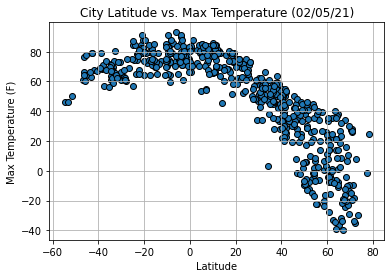

In [15]:
x_values = weather['Lat']
y_values = weather['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (02/05/21)')
plt.savefig('output_data/CityLatitudeVsMaxTemp.png')

This plot shows that the higher the latitude, the colder the temperature, and the further negative of zero the warmer the climate zone

## Latitude vs. Humidity Plot

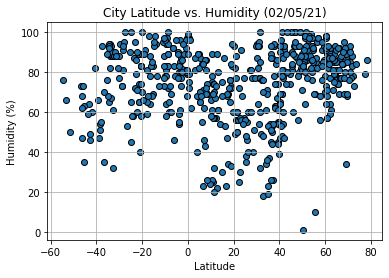

In [16]:
x_values = weather['Lat']
y_values = weather['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (02/05/21)')
plt.savefig('output_data/CityLatitudeVsHumidity.png')

As the latitude gets higher, humidity gets higher

## Latitude vs. Cloudiness Plot

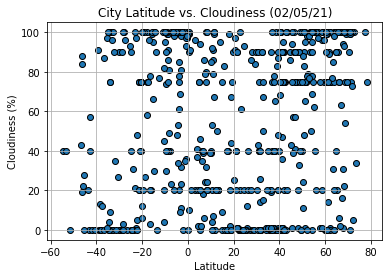

In [17]:
x_values = weather['Lat']
y_values = weather['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (02/05/21)')
plt.savefig('output_data/CityLatitudeVsCloudiness.png')

Cloudiness is widespread thoughout 

## Latitude vs. Wind Speed Plot

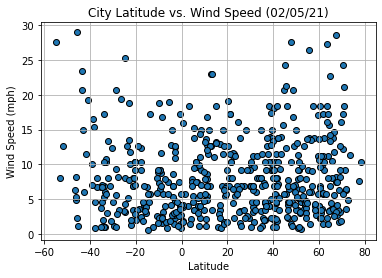

In [18]:
x_values = weather['Lat']
y_values = weather['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (02/05/21)')
plt.savefig('output_data/CityLatitudeVsWindSpeed.png')

Wind speed data is widely spread across the latitude 

## Linear Regression

In [19]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather.loc[weather['Lat'] > 0, :]
southern_hemisphere_df = weather.loc[weather['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8681436508591281


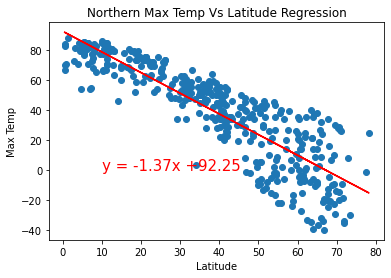

In [21]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernMaxTempVsLatitudeReg.png', (10,0))

There is a negative correlation between latidtude and max temperature for northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5184649073657732


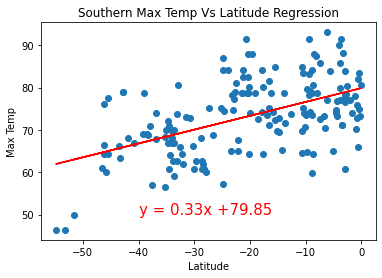

In [22]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernMaxTempVsLatitudeReg.png', (-40,50)) 

There is a postive correlation between latitude and the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37200909522849196


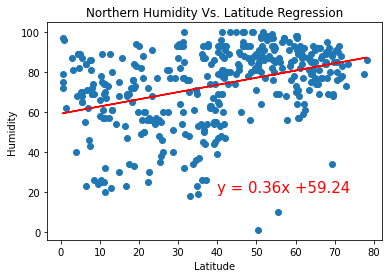

In [23]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityVsLatitudeReg.png', (40,20))

There is a positive correlation between the latitude and amount of humidity 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3088690870434382


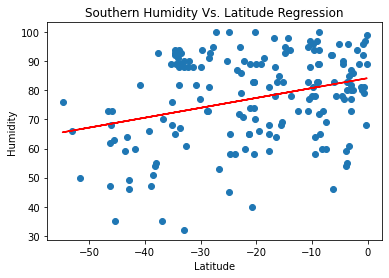

In [24]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityVsLatitudeReg.png', (-50,20))

There is a positive correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3144777242375143


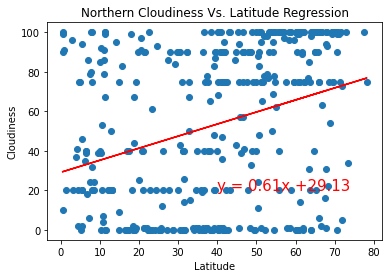

In [25]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessVsLatitudeReg.png', (40,20))

There is a positive correlation between latitude and cloudiness for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3557324013920528


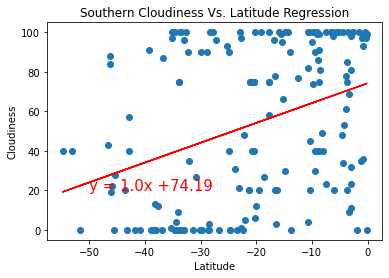

In [26]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessVsLatitudeReg.png', (-50,20))

There is a weak positive correlation between latitdue and cloudiness for southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.055489724543720635


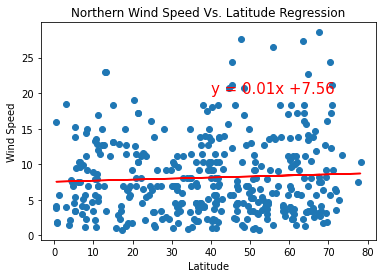

In [27]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWindSpeedVsLatitudeReg.png', (40,20))

There is a positive correlation between latitude and windspeed for northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2580328412766713


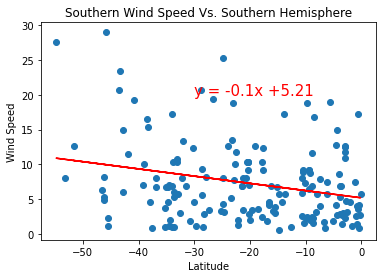

In [28]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWindSpeedVsLatitudeReg.png', (-30,20))

There is a negative correlation between latitude and wind speed for souther hemisphere.